In [57]:
import sys
!{sys.executable} -m pip install -q scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/rent/Bangalore_rent.csv", thousands=',')

In [5]:
df.head(5)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,2,BHK,Independent Floor,kamakshipalya,20000.0,1140,Semi-Furnished,2 bathrooms
1,OWNER,2,BHK,Independent House,Kadugodi Industrial Area,8000.0,840,Semi-Furnished,2 bathrooms
2,OWNER,2,BHK,Independent House,Koramangala,21000.0,1000,Semi-Furnished,2 bathrooms
3,OWNER,1,BHK,Apartment,Sadduguntepalya,9000.0,550,Semi-Furnished,1 bathrooms
4,OWNER,3,BHK,Apartment,Chandapura,17000.0,1230,Furnished,3 bathrooms


## EDA

In [9]:
df = df.replace('', np.nan)
df.isna().any()
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23106 entries, 0 to 23539
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seller_type    23106 non-null  object 
 1   bedroom        23106 non-null  int64  
 2   layout_type    23106 non-null  int64  
 3   property_type  23106 non-null  object 
 4   locality       23106 non-null  object 
 5   price          23106 non-null  float64
 6   area           23106 non-null  float64
 7   furnish_type   23106 non-null  object 
 8   bathroom       23106 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [10]:
df[df["bathroom"] == "2 of 5floor"][:2]

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
17114,AGENT,1,RK,Studio Apartment,BTM Layout,6000.0,300,Semi-Furnished,2 of 5floor
17204,AGENT,1,RK,Studio Apartment,BTM Layout,6000.0,300,Semi-Furnished,2 of 5floor


In [11]:
df["price"] = pd.to_numeric(df["price"])

In [12]:
for i in df.columns:
    print(f"{i} : {len(df[i].value_counts())}")

seller_type : 3
bedroom : 10
layout_type : 2
property_type : 6
locality : 876
price : 594
area : 1130
furnish_type : 3
bathroom : 20


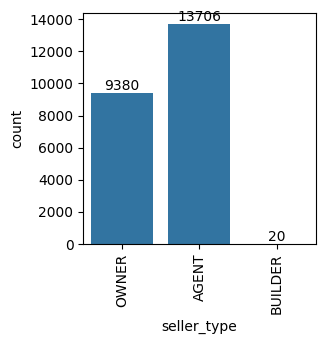

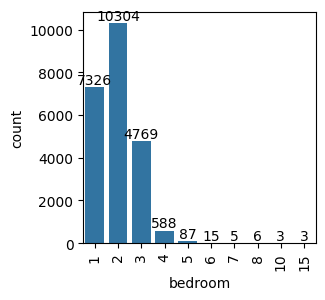

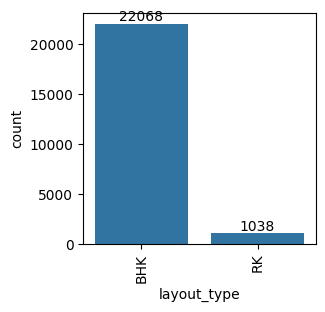

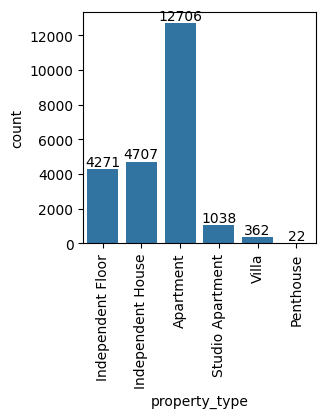

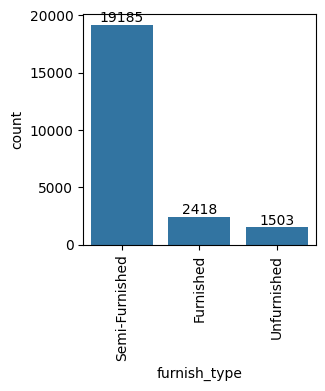

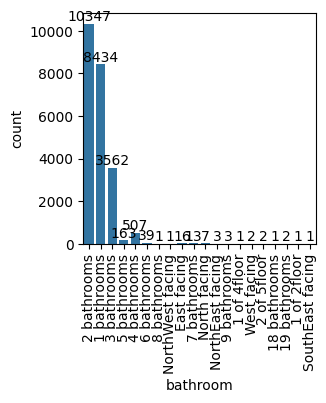

In [334]:
for i in df.columns:
    if len(df[i].value_counts()) <=20:
        plt.figure(figsize=(3,3))
        ax = sns.countplot(x=i, data = df)
        ax.bar_label(ax.containers[0])
        plt.xticks(rotation=90)
        plt.show()

## Feature enginerring

In [13]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
df["area"] = mn.fit_transform(df[["area"]])

In [14]:
df["layout_type"] = df['layout_type'].map({'BHK': 1, 'RK': 0})

In [16]:
df = df[df.bathroom.str.contains('bathrooms')]
df['bathroom'] = df['bathroom'].str.replace(r'[^\d.]+', '', regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23072 entries, 0 to 23539
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seller_type    23072 non-null  object 
 1   bedroom        23072 non-null  int64  
 2   layout_type    23072 non-null  int64  
 3   property_type  23072 non-null  object 
 4   locality       23072 non-null  object 
 5   price          23072 non-null  float64
 6   area           23072 non-null  float64
 7   furnish_type   23072 non-null  object 
 8   bathroom       23072 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [31]:
df = df.groupby('bathroom').filter(lambda x : len(x)>3)
df = df.groupby('bedroom').filter(lambda x : len(x)>6)
df["bathroom"] = df["bathroom"].astype("float64", errors="raise")
df = df.reset_index(drop=True)

In [32]:
df.bedroom.value_counts()

bedroom
2    10298
1     7302
3     4768
4      585
5       87
6       15
Name: count, dtype: int64

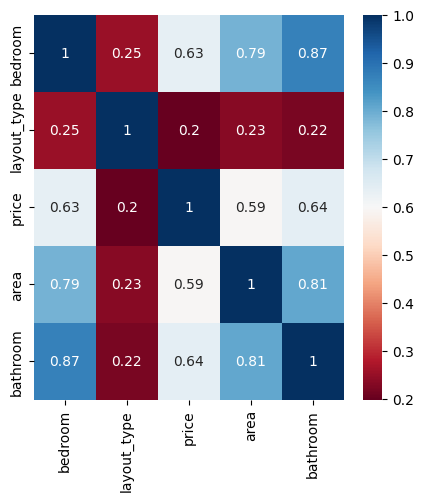

In [20]:
plt.figure(figsize=(5,5))
X=df.select_dtypes(include='number')
cor = X.corr()
sns.heatmap(cor, annot=True, cmap="RdBu")
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23055 entries, 0 to 23539
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seller_type    23055 non-null  object 
 1   bedroom        23055 non-null  int64  
 2   layout_type    23055 non-null  int64  
 3   property_type  23055 non-null  object 
 4   locality       23055 non-null  object 
 5   price          23055 non-null  float64
 6   area           23055 non-null  float64
 7   furnish_type   23055 non-null  object 
 8   bathroom       23055 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.8+ MB


In [33]:
from sklearn.preprocessing import OneHotEncoder

one=OneHotEncoder()
X=df[["seller_type","property_type","furnish_type"]]
temp = one.fit_transform(X).toarray()
len(temp)

23055

In [35]:
onehot_data = pd.DataFrame(columns=one.get_feature_names_out(), data = temp)
df = pd.concat([df,onehot_data], axis=1)
df.drop(columns=["seller_type","property_type","furnish_type","bathroom","locality"], inplace=True)

In [36]:
df.select_dtypes(include="number")

,bedroom,layout_type,price,area,seller_type_AGENT,seller_type_BUILDER,seller_type_OWNER,property_type_Apartment,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,furnish_type_Furnished,furnish_type_Semi-Furnished,furnish_type_Unfurnished
0,2,1,20000.0,0.097196,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1,8000.0,0.069159,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,1,21000.0,0.084112,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,9000.0,0.042056,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3,1,17000.0,0.105607,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23050,1,1,6000.0,0.037383,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23051,2,1,10500.0,0.028037,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
23052,2,1,16000.0,0.093458,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
23053,2,1,24000.0,0.084112,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Apply Regression

In [37]:
df.head()

,bedroom,layout_type,price,area,seller_type_AGENT,seller_type_BUILDER,seller_type_OWNER,property_type_Apartment,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,furnish_type_Furnished,furnish_type_Semi-Furnished,furnish_type_Unfurnished
0,2,1,20000.0,0.097196,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1,8000.0,0.069159,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,1,21000.0,0.084112,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,9000.0,0.042056,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3,1,17000.0,0.105607,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
from sklearn.model_selection import train_test_split
X=df["area"]
y=df["price"]
trainX,testX,trainy,testy = train_test_split(X, y,test_size=0.2,random_state=42,shuffle=False)

In [39]:
print(trainX.shape, trainy.shape,testX.shape,testy.shape)

(18444,) (18444,) (4611,) (4611,)


In [40]:
### Linear regression
# cost func derivative = 1/m * Sum of [(h(x(i)) - y(i))] for Theta0
# cost func derivative = 1/m * Sum of [(h(x(i)) - y(i)) * x(i) ] for theta1

# New value = thetai - LR*derivative

In [47]:
#pick some random value to start with
theta_0 = np.random.random()
theta_1 = np.random.random()

In [48]:
def hypothesis (theta_0,theta_1,x):
    return theta_0 + theta_1 * x

In [49]:
def cost_function (X, y, theta_0, theta_1):
    m = len(X)
    summation = 0.0
    for i in range (m):
        summation += ((theta_0 + theta_1 * X[i] ) - y[i])**2
    return summation /(2*m)

In [50]:
def gradient_descent(X,y,theta_0,theta_1,learning_rate):
    t0_deriv = 0
    t1_deriv = 0
    m = len(X)
    
    for i in range (m):
        t0_deriv += (theta_0 + theta_1 * X[i]) - y[i]
        t1_deriv += ((theta_0 + theta_1 * X[i] ) - y[i]) * X[i]
    theta_0 -= (1/m) * learning_rate * t0_deriv
    theta_1 -= (1/m) * learning_rate * t1_deriv
    
    return theta_0,theta_1

In [51]:
def training (X, y, theta_0, theta_1, learning_rate, iters):
    cost_history = [0]
    t0_history = [0]
    t1_history = [0]
    
    for i in range(iters):
        theta_0, theta_1 = gradient_descent(X, y, theta_0, theta_1, learning_rate)
        t0_history.append(theta_0)
        t1_history.append(theta_1)
        cost = cost_function(X, y, theta_0, theta_1)
        cost_history.append(cost)
        if i%10 == 0:
            print ("iter={}, theta_0={}, theta_1={}, cost= {}".format(i, theta_0, theta_1, cost))
    return t0_history, t1_history, cost_history

In [52]:
t0_history, t1_history, cost_history = training (trainX, trainy, theta_0, theta_1, 0.01, 2000)

iter=0, theta_0=206.95162417412453, theta_1=26.256207832594452, cost= 295625216.94961524
iter=10, theta_0=2164.288237609164, theta_1=270.7247545160907, cost= 256879385.1031414
iter=20, theta_0=3932.224165167858, theta_1=496.2281339817678, cost= 225248338.02378705
iter=30, theta_0=5529.042018333869, theta_1=704.5950989999919, cost= 199424823.81134653
iter=40, theta_0=6971.259629336812, theta_1=897.4778777575408, cost= 178341782.2504007
iter=50, theta_0=8273.800401306216, theta_1=1076.3692133764537, cost= 161128212.50027603
iter=60, theta_0=9450.147214909563, theta_1=1242.61775864663, cost= 147073149.5619509
iter=70, theta_0=10512.481478730811, theta_1=1397.44198473968, cost= 135596259.63238716
iter=80, theta_0=11471.808757429722, theta_1=1541.942747346054, cost= 126223838.20605002
iter=90, theta_0=12338.072273298905, theta_1=1677.1146398313447, cost= 118569218.23426181
iter=100, theta_0=13120.25545177216, theta_1=1803.8562504980725, cost= 112316778.0477023
iter=110, theta_0=13826.474568

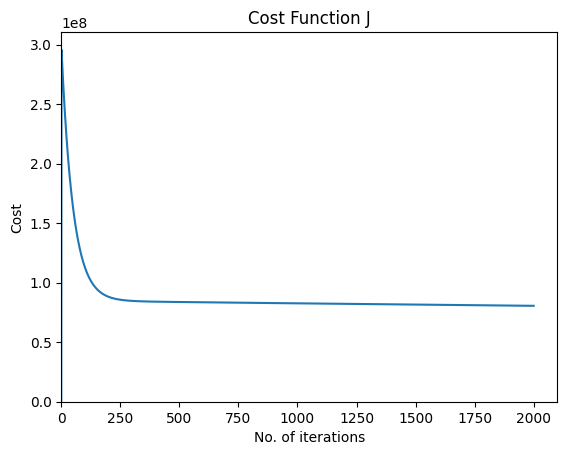

In [53]:
#Plot the cost function
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_history)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

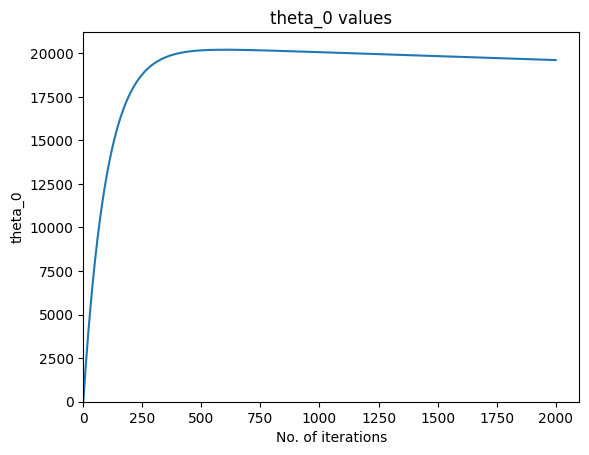

In [54]:
#Plot the cost function
plt.title('theta_0 values')
plt.xlabel('No. of iterations')
plt.ylabel('theta_0')
plt.plot(t0_history)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

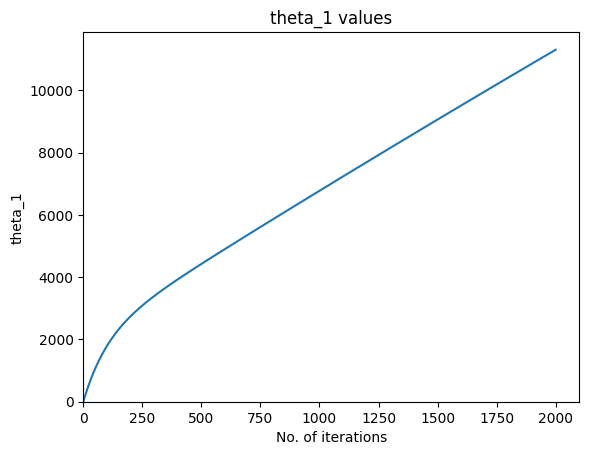

In [55]:
#Plot the cost function
plt.title('theta_1 values')
plt.xlabel('No. of iterations')
plt.ylabel('theta_1')
plt.plot(t1_history)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

In [60]:
print(f"theta0={t0_history[-1]} theta1 = {t1_history[-1]} cost func = {cost_history[-1]}")

theta0=19609.06264369925 theta1 = 11309.976042407987 cost func = 80551476.06416145


In [73]:
t0_history[-1]+t1_history[-1]*0.084112

20560.36734857827

### Regression using library

In [97]:
from sklearn.linear_model import LinearRegression

X=df[["area"]]
y=df["price"]
trainX,testX,trainy,testy = train_test_split(X, y,test_size=0.2,random_state=42,shuffle=False)

lin_reg=LinearRegression(
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
    )

lin_reg.fit(trainX,trainy)

LinearRegression()

In [74]:
print(lin_reg.coef_)
print(lin_reg.intercept_)
print(lin_reg.predict([X.loc[2]]))
print(y[2])

[118853.59410284]
8851.857780707587
[18848.88906039]
21000.0


/Users/jyotsana/codebase/regression/venv1/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [96]:
y.values

array([20000.,  8000., 21000., ..., 16000., 24000., 19000.])

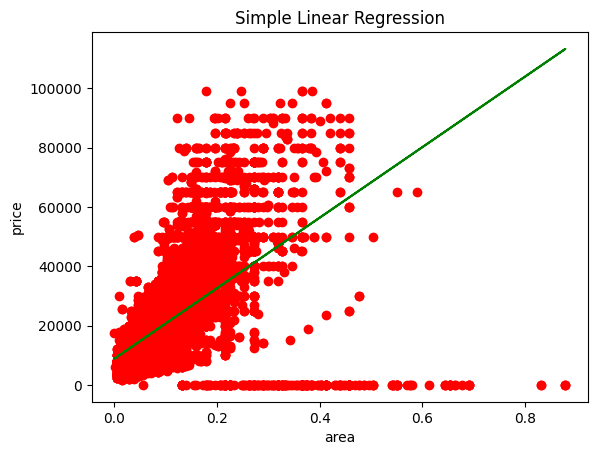

In [75]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='green')
plt.title('Simple Linear Regression')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

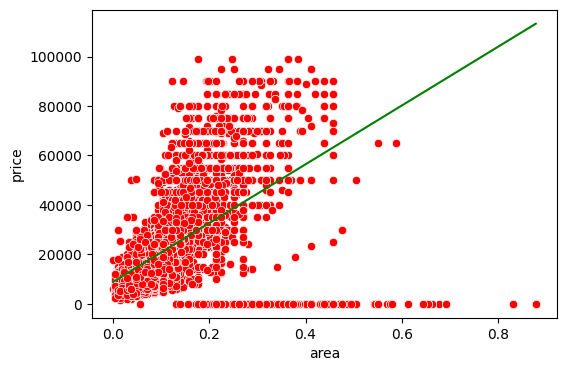

In [91]:
fig, ax = plt.subplots(figsize=(6, 4))
p1 = sns.scatterplot(data=df, x="area",y="price", color="red", ax=ax)
p2 = sns.lineplot(x=df["area"],y=lin_reg.predict(X), color='g', ax=ax)

In [117]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures # Generate polynomial and interaction features
X = np.arange(6).reshape(3, 2)
y = np.arange(3)
poly = PolynomialFeatures(2)
poly.fit_transform(X)

poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [118]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg2=PolynomialFeatures(degree=2)
X_poly=poly_reg2.fit_transform(X)

lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)


LinearRegression()

In [119]:
lin_reg_2.coef_

array([ 0.00000000e+00,  1.25000000e-01,  1.25000000e-01, -1.25000000e-01,
       -1.78977896e-16,  1.25000000e-01])

In [120]:
poly_reg2.powers_

array([[0, 0],
       [1, 0],
       [0, 1],
       [2, 0],
       [1, 1],
       [0, 2]])